# Check lfp-derived spikes

author: steeve.laquitaine@epfl.ch


* `534` near-contact cells
* `472` pyramidal cells


In [2]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import glob

# SET PROJECT PATH
# PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config, write_metadata
from src.nodes.prepro import preprocess
from src.nodes.truth.silico import ground_truth
from src.nodes.io.loading import load_campaign_params
from src.nodes.dataeng.silico import probe_wiring
# from src.pipes.sorting import match_sorted_to_true_neuropixels_2023_02_19 as match
from src.nodes.postpro import waveform, feateng

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"   # specifies the experiment 
SIMULATION_DATE = "2023_02_19"      # specifies the run (date)
MS_BEFORE = 3       # ms
MS_AFTER = 3        # ms
CELL_ID = 4229506   # the most active near-probe pyramidal cell
CHANNEL_IDS = np.arange(64,80).tolist()   # plot traces from channels nearest to filtered neuron group
LOAD_GROUND_TRUTH = True
LOAD_WAVEFORMS = True


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# SETUP PATH
SPIKE_FILE_PATH = data_conf["dataeng"]["campaign"]["output"]["spike_file_path"]
RAW_LFP_TRACE_FILE_PATH = data_conf["dataeng"]["campaign"]["output"]["trace_file_path"]
CELL_TRACE_FILE_PATH = data_conf["dataeng"]["campaign"]["output"]["unit_trace_path"]+"cell_3754013_trace.pkl"
CELL_MATCHING_PATH = data_conf["postprocessing"]["cell_matching"]


# SET WAVEFORM FOLDER
STUDY_FOLDER = data_conf["postprocessing"]["waveform"]["study"]


# FIGURE 
# FIG_PATH = data_conf["figures"]["silico"]["lfp_derived_waveforms"]
FIG_PATH = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/cns_2023/figures/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/all_waveforms_regression_test/'

2023-07-07 22:12:16,964 - root - utils.py - get_config - INFO - Reading experiment config.
2023-07-07 22:12:16,998 - root - utils.py - get_config - INFO - Reading experiment config. - done


## Check spike SNR and consistency 

1. We preprocess the raw LFP traces
2. We extract the waveforms within -3 to 3 ms centered on the spike timestamps of the most active pyramidal to have a large enough spike sample size.
3. We plot the spike-triggered average of each contact
4. We plot the neuron and contact locations associated with each spike triggered average

TODO:
- spike location conversion takes lots of time. Solve or parallelize.

In [8]:
# # WARNING ! Preprocess recording and extract spikes (stats: 2 hours / 10 min recording, 534 near-contact cells)
# WaveformExtractor = waveform.run_from_files(
#     experiment=EXPERIMENT,
#     simulation_date=SIMULATION_DATE,
#     lfp_trace_file=RAW_LFP_TRACE_FILE_PATH,
#     spike_file=SPIKE_FILE_PATH,
#     study_folder=STUDY_FOLDER,
#     ms_before=MS_BEFORE,
#     ms_after=MS_AFTER,
#     load_preprocessed=False
#     )

2023-07-07 20:24:12,698 - root - utils.py - get_config - INFO - Reading experiment config.
2023-07-07 20:24:12,723 - root - utils.py - get_config - INFO - Reading experiment config. - done


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


Set parameters in  24.866008281707764 sec
Loaded raw recording and spikes in  0.2834346294403076 sec
Found spike loc for trace sampfreq in  5471.8291482925415 sec
2023-07-07 21:55:49,677 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting raw traces as SpikeInterface Recording object ...


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-07-07 21:56:11,430 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting as raw traces as SpikeInterface Recording object - done in 21.8
2023-07-07 21:56:11,432 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe ...


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-07-07 21:56:38,284 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe - done in 26.9
2023-07-07 21:56:38,286 - root - probe_wiring.py - run_neuropixels_32 - INFO - wiring neuropixels-32 probe to recording - done
write_binary_recording with n_jobs = 1 and chunk_size = None
Preprocessed recording in  72.68542766571045 sec
write_binary_recording with n_jobs = 1 and chunk_size = None
Created study in  22.787293910980225 sec
Computed waveforms in  12.849528551101685 sec
Extracted waveforms in  15.905576944351196 sec


In [4]:
# load existing waveform extractor
if LOAD_WAVEFORMS:
    print("loading")
    lfp_recording = preprocess.load(data_conf)
    WaveformExtractor = waveform.load(lfp_recording, study_folder=STUDY_FOLDER, ms_before=MS_BEFORE, ms_after=MS_AFTER,)
else:
    # WARNING ! Preprocess recording and extract spikes (stats: 2 hours / 10 min recording, 534 near-contact cells)
    print("running")
    WaveformExtractor = waveform.run_from_files(
        experiment=EXPERIMENT,
        simulation_date=SIMULATION_DATE,
        lfp_trace_file=RAW_LFP_TRACE_FILE_PATH,
        spike_file=SPIKE_FILE_PATH,
        study_folder=STUDY_FOLDER,
        ms_before=MS_BEFORE,
        ms_after=MS_AFTER,
        load_preprocessed=False
        )

## Save spike waveform plots

In [5]:
# filter all near-contact pyramidal cells
simulation = load_campaign_params(data_conf)
if LOAD_GROUND_TRUTH:
    Truth = ground_truth.load(data_conf)
else:
    Truth = ground_truth.run(simulation, data_conf, param_conf)["ground_truth_sorting_object"]
cell_morph = simulation["circuit"].cells.get(Truth.unit_ids, properties=['morph_class'])
CELL_IDS = cell_morph[cell_morph["morph_class"] == "PYR"].index.values
print("near-contact pyramidal cells (count): ", len(CELL_IDS))

In [1]:
# for each pyramidal cell (15 min for 472 cells)
for cell_i in CELL_IDS:
    
    # plot waveform
    fig = waveform.plot(WaveformExtractor=WaveformExtractor, cell_id=cell_i)

    # write
    if not os.path.isdir(f"{FIG_PATH}pyramidal/"):
        os.makedirs(f"{FIG_PATH}pyramidal/")
    fig.savefig(f"{FIG_PATH}pyramidal/cell_{cell_i}", dpi=300, bbox_inches='tight')

    # prevent display in notebook
    plt.close()

NameError: name 'CELL_IDS' is not defined

## Sort cells by "missed sparse cells" vs "detected sparse cells"

In [13]:
# stats: 40 secs, 534 cells, 1 sorter
# create Matching object 
out = match.run()

# load created Matching object
cell_matching = pd.read_parquet(CELL_MATCHING_PATH)

# label missed and detected cells
cell_matching = feateng.add_is_missed(cell_matching, data_conf)

2023-05-01 12:37:09,906 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor
2023-05-01 12:37:10,186 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor - done: 0.3
2023-05-01 12:37:10,191 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor
2023-05-01 12:37:10,213 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor - done: 0.0
2023-05-01 12:37:40,348 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell oversplit - done
2023-05-01 12:37:40,364 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell misses - done


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/src/pipes/sorting/match_sorted_to_true_neuropixels_2023_02_19.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_matching["oversplit_true_cell"].iloc[oversplit.index] = True


2023-05-01 12:37:40,820 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor
2023-05-01 12:37:40,836 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor - done: 0.0
2023-05-01 12:37:40,837 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor
2023-05-01 12:37:40,849 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor - done: 0.0
2023-05-01 12:37:52,146 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell oversplit - done
2023-05-01 12:37:52,153 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell misses - done


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/src/pipes/sorting/match_sorted_to_true_neuropixels_2023_02_19.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_matching["oversplit_true_cell"].iloc[oversplit.index] = True


In [58]:
# find id of missed and detected sparse cells
df = cell_matching.drop_duplicates(subset=['true_cell_match'])
detected_sparse_cells = df[(df["true firing rate"]<=0.2) & (df["detection_label"]=="detected")]["true_cell_match"]
missed_sparse_cells = df[(df["true firing rate"]<=0.2) & (df["detection_label"]=="missed")]["true_cell_match"]

In [57]:
# loop through waveform figures and sort
waveform_figs = glob.glob(f"{FIG_PATH}pyramidal/*.png")

# create path to sort figures
os.makedirs(f"{FIG_PATH}pyramidal/missed_sparse/")
os.makedirs(f"{FIG_PATH}pyramidal/detected_sparse/")

# loop through waveform figures and sort
for fig_i, fig_name in enumerate(waveform_figs):
    
    # get figure's cell id
    fig_cell_id = int(os.path.basename(fig_name).removeprefix("cell_").removesuffix(".png"))

    # sort and copy missed and detected sparse cell figures
    # in two folders
    if fig_cell_id in missed_sparse_cells.values:
        shutil.copy2(f"{FIG_PATH}pyramidal/cell_{fig_cell_id}.png", f"{FIG_PATH}pyramidal/missed_sparse/cell_{fig_cell_id}.png")
    elif fig_cell_id in detected_sparse_cells.values:
        shutil.copy2(f"{FIG_PATH}pyramidal/cell_{fig_cell_id}.png", f"{FIG_PATH}pyramidal/detected_sparse/cell_{fig_cell_id}.png")

## Check SNR

`Result: The spike waveforms of an example active pyramidal cell within 50 microns of a probe contact (green lines), overlaid on a spike triggered average plot, are clearly visible (above background noise) and consistent over time.`

## Get near-contact PYR. cells

In [8]:
# get near-contact pyramidal cells (stats: 2 min)
simulation = load_campaign_params(data_conf)

# (stats: run takes 1-1.5 h for 534 cells near the contacts)
if not os.path.isdir(data_conf["sorting"]["simulation"]["ground_truth"]["output"]):
    SortingExtractor = ground_truth.run(simulation_params, data_conf, param_conf)
    SortingExtractor = SortingExtractor["ground_truth_sorting_object"]
else:
    SortingExtractor = ground_truth.load(data_conf)

cell_morph = simulation["circuit"].cells.get(SortingExtractor.unit_ids, properties=['morph_class'])
CELL_IDS = cell_morph[cell_morph["morph_class"] == "PYR"].index.values
print("near-contact pyr. cells (count): ", len(CELL_IDS))

2023-03-03 13:31:40,665 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-03-03 13:31:40,680 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0
near-contact pyr. cells (count):  472


## Save plots of PYR spikes

TODO: 
- refactor for job submission on cluster.

In [26]:
# WARNING !! (takes 1h)
for cell_i in CELL_IDS:
    
    # compute waveform plot
    fig = waveform.plot(WaveformExtractor=WaveformExtractor, cell_id=cell_i)

    # write
    if not os.path.isdir(f"{FIG_PATH}pyramidal/"):
        os.makedirs(f"{FIG_PATH}pyramidal/")
    fig.savefig(f"{FIG_PATH}pyramidal/cell_{cell_i}", dpi=300, bbox_inches='tight')

# show
# plt.show()

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/src/nodes/postpro/waveform.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3, 3))


## Check spike spatial variation

`Result: The spike waveforms are most visible on channel (71) on which it has maximum positive and negative amplitudes and nearby channels (72,73,74) in agreement with its estimated location on channel 72, rightward to channel 71.`

In [15]:
# fig = waveform.plot_by_channel(WaveformExtractor, channel_ids=CHANNEL_IDS, cell_id=CELL_ID, figsize=(2,35))
# print("cell's waveforms (green) and its median (Fuchsia) by channel (pannels)")

In [77]:
# get chosen cell's coordinate
cell_coord = simulation["circuit"].cells.get(CELL_ID, properties=["x","y","z"])
print("cell coordinates:\n", cell_coord)

# wire the recording with its probe and get the probe's contact coordinates
recording = probe_wiring.run(data_conf, param_conf)
probe_wiring.write(recording, data_conf)
probe = recording.get_probe()
probe_coord = probe.contact_positions.astype(float)
print("contact x-y coordinates:\n", probe_coord[:,:1])

cell coordinates:
 x    4071.212207
y   -1273.451867
z   -2338.888698
Name: 4229506, dtype: float64
2023-03-03 13:59:27,655 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting raw traces as SpikeInterface Recording object ...
2023-03-03 13:59:50,835 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting as raw traces as SpikeInterface Recording object - done in 23.2
2023-03-03 13:59:50,836 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe ...
2023-03-03 14:00:17,793 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe - done in 27.0
2023-03-03 14:00:17,795 - root - probe_wiring.py - run_neuropixels_32 - INFO - wiring neuropixels-32 probe to recording - done
write_binary_recording with n_jobs = 1 and chunk_size = None
2023-03-03 14:00:36,362 - root - probe_wiring.py - write - INFO - Probe wiring done in  18.0 secs
2023-03-03 14:00:36,363 - root - probe_wiring.py - write - INFO - Probe wirin

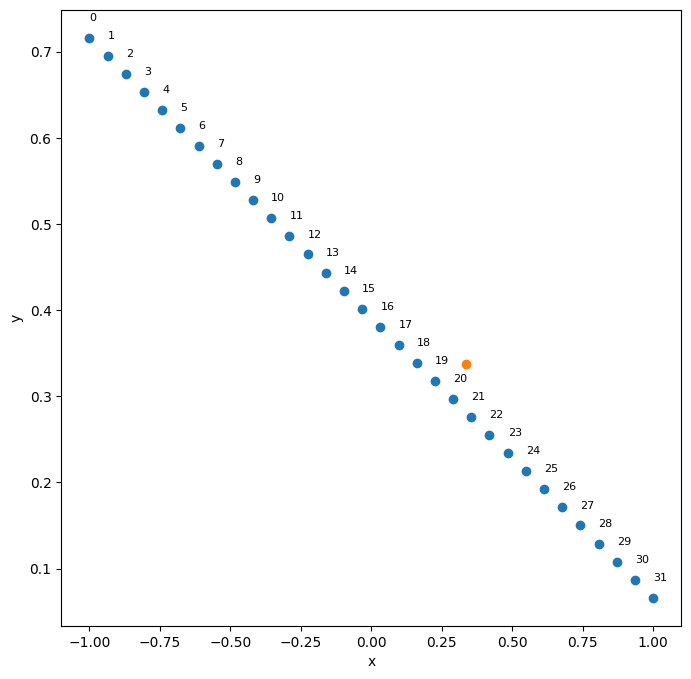

In [78]:
# scale coordinates linearly between -1 and 1 for plot (0 being the cell coordinates)
norm_contact_coord = np.subtract(probe_coord[:,:2], cell_coord.values[:2])
ncc = norm_contact_coord
ncc_max = norm_contact_coord.max().max()
ncc_min = norm_contact_coord.min().min()
scaled_contact_coord = (ncc-ncc_min)/(ncc_max-ncc_min)*2-1

# normalize cell
norm_cell_coord = np.array([0,0])
scaled_cell_coords = (norm_cell_coord - ncc_min)/(ncc_max-ncc_min)*2-1

# plot
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(scaled_contact_coord[:,0], scaled_contact_coord[:,1], "o");
ax.plot(scaled_cell_coords[0], scaled_cell_coords[1], "o");
ax.set_xlabel("x");
ax.set_ylabel("y");

contact_ids = probe.device_channel_indices

# annotate contacts with their ids
for ix in range(len(probe_coord)):
    ax.text(
        scaled_contact_coord[ix, 0],
        scaled_contact_coord[ix, 1]+0.02,
        "%s" % (str(contact_ids[ix])),
        size=8,
        zorder=1,
        color="k",
    )

In [89]:
# print(WaveformExtractor.sorting.unit_ids)
spike_count = SortingExtractor.get_total_num_spikes()[4229506] 
cell_firing_rate = SortingExtractor.get_total_num_spikes()[4229506] / 500
print(cell_firing_rate)
print(spike_count)

0.624
312


In [79]:
# get chosen cell's coordinate
CELL_ID = 4229506
cell_coord = simulation["circuit"].cells.get(CELL_ID, properties=["x","y","z"])
print("cell coordinates:\n", cell_coord)

cell coordinates:
 x    4071.212207
y   -1273.451867
z   -2338.888698
Name: 4229506, dtype: float64


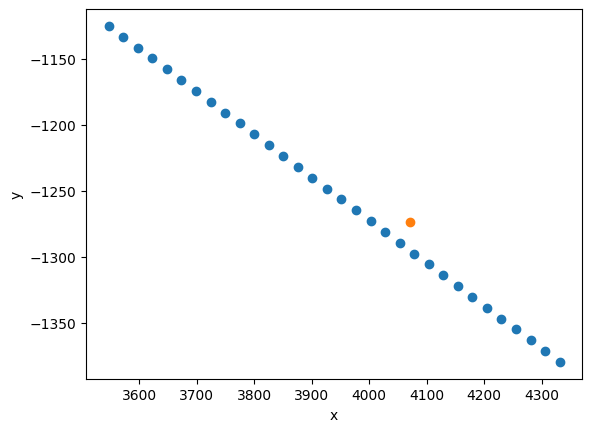

In [80]:
# test that the euclidean distances are preserved compared to the raw coordinates
plt.plot(probe_coord[:,0], probe_coord[:,1], "o");
plt.plot(cell_coord.x, cell_coord.y, "o");
plt.xlabel("x");
plt.ylabel("y");

TODO:
- Color each trace by its peak to peak amplitude (like in `Buszaki, Koch, Journal of Neuroscience`)

contacts (numbers), median spike (lines), pyramidal cell (red dot). The contacts are located at the center of each spike panel.
channels (color)


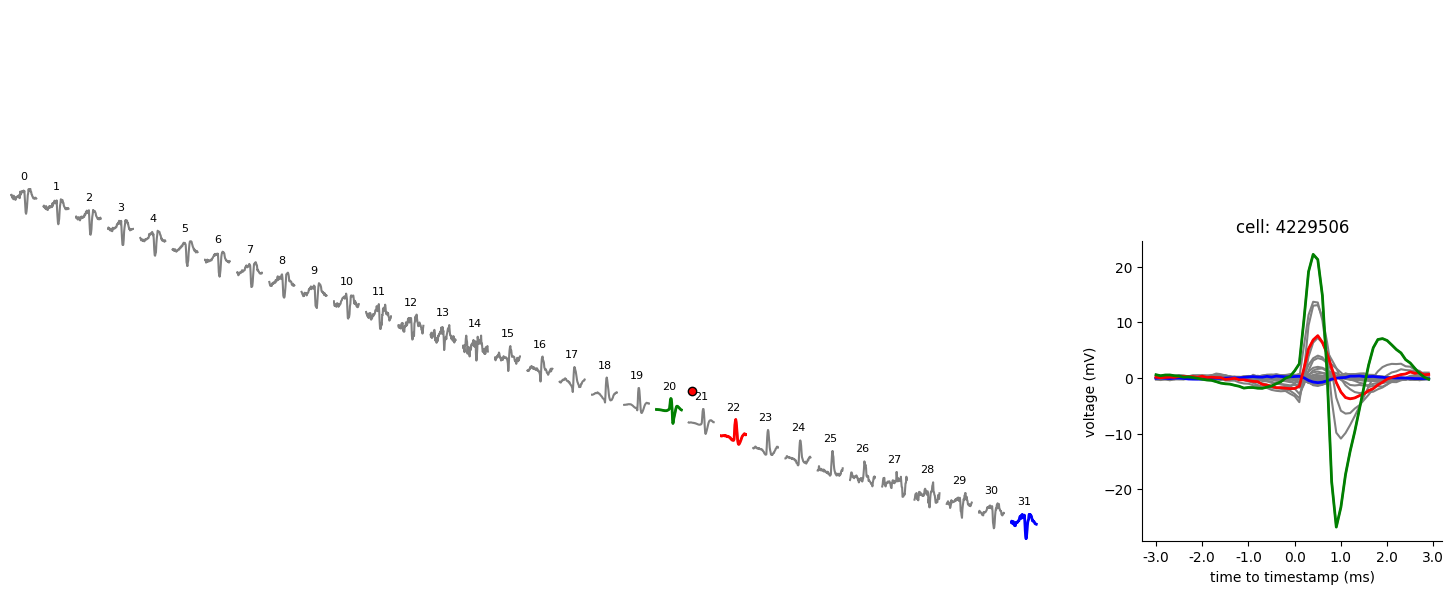

In [83]:
# setup plot
fig = plt.figure(figsize=(5,5));

# Plot spatial variation
# --------------------
# create plane and panel parameters
x_y_plane = [0.1, 0.1, 1, 1]
panel_width = 0.055

# plot x-y-plane
ax = fig.add_axes(x_y_plane);
ax.axis('off');

# plot cell panel in the x-y plane
coord_cell_panel = [scaled_cell_coords[0]-panel_width/2, scaled_cell_coords[1]-panel_width/2, panel_width, panel_width]
ax0 = fig.add_axes(coord_cell_panel)
ax0.plot(0.0, marker="o", markerfacecolor="r", markeredgecolor="k");
ax0.axis('off');

median_spike = WaveformExtractor.get_template(unit_id=CELL_ID, mode='median');

DISTANT_CHANNEL = 31
NEARBY_CHANNEL_RIGHT = 20
NEARBY_CHANNEL_LEFT = 22

# plot each contact's average spike panel in the x-y plane
for ix in range(len(scaled_contact_coord)):
    
    # center each panel on the associated contact coordinate
    coord_contact_i = [scaled_contact_coord[ix,0]-panel_width/2, scaled_contact_coord[ix,1]-panel_width/2, panel_width, panel_width]

    # contact
    ax0 = fig.add_axes(coord_contact_i)
    ax0.plot(median_spike[:,ix], color=[.5, .5, .5]);
    if ix == DISTANT_CHANNEL:
        ax0.plot(median_spike[:,ix], color="b", linewidth=2);
    if ix == NEARBY_CHANNEL_LEFT:
        ax0.plot(median_spike[:,ix], color="r", linewidth=2);
    if ix == NEARBY_CHANNEL_RIGHT:
        ax0.plot(median_spike[:,ix], color="g", linewidth=2);
    ax0.axis('off');
    ax0.set_title(ix, fontsize=8)

print("contacts (numbers), median spike (lines), pyramidal cell (red dot). The contacts are located at the center of each spike panel.")

# get unit waveforms (n_spikes, n_sample, n_channels)
wfs = WaveformExtractor.get_waveforms(CELL_ID);

# plot unit median waveforms by channel on the same level as the cell's y-axis
# to see spike amplitude difference
panel_width = 0.6
panel_offset = 1.2
x_y_plane2 = [scaled_cell_coords[0]-panel_width/2 + panel_offset, scaled_cell_coords[1]-panel_width/2, panel_width, panel_width]
ax1 = fig.add_axes(x_y_plane2);
median_spike = WaveformExtractor.get_template(unit_id=CELL_ID, mode='median');
ax1.plot(median_spike, color=[.5, .5, .5]);
ax1.plot(median_spike[:, DISTANT_CHANNEL], color="b", linewidth=2);
ax1.plot(median_spike[:, NEARBY_CHANNEL_LEFT], color="r", linewidth=2);
ax1.plot(median_spike[:, NEARBY_CHANNEL_RIGHT], color="g", linewidth=2);

ms_timestep = 6 / median_spike.shape[0]
x_ticklabels = np.arange(-ms_timestep * median_spike.shape[0]/2, ms_timestep * median_spike.shape[0]/2 + 1)
ms_timestep = 1/simulation["lfp_sampling_freq"]*1000
x_ticks = np.arange(0, median_spike.shape[0]+1, 1/ms_timestep)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticklabels)
ax1.set_xlabel("time to timestamp (ms)")
ax1.set_ylabel("voltage (mV)")

ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title(f'cell: {CELL_ID}');
print("channels (color)")

In [ ]:

# # cell_coord
# # probe_coord[:,16]

# # calculate euclidean distance b/w cells and channel contacts
# nearest_channel = []
# for c_i, cell_i in enumerate(cell_coord.index):
#     channel_dist = []
#     for ch_i in range(probe_coord.shape[0]):
#         channel_dist.append(scipy.spatial.distance.euclidean(cell_coord.iloc[c_i], probe_coord[ch_i, :]))
#     nearest_channel.append(np.argmin(np.array(channel_dist)))
# nearest_channel_series = pd.Series(data=nearest_channel, index=cell_coord.index)

# # get_most_active_cell()

In [64]:
# TODO:
# - I do a screenshot for now, but need to implement automatic saving

# # save figure
# fig.savefig(FIG_PATH+".png")

# # write metadata
# metadata = {
#     "fig_path": FIG_PATH,
#     "creation_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
#     "simulation_date": SIMULATION_DATE,
#     "data_conf": data_conf,
#     "param_conf": param_conf,
#     }
# write_metadata(metadata, FIG_PATH)

In [2]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy


# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
os.chdir(PROJ_PATH)
from src.nodes.prepro import preprocess
from src.nodes.postpro import waveform
from src.nodes.utils import get_config
from src.nodes.truth.silico import ground_truth
from src.nodes.io.silico.loading import load_campaign_params
from src.nodes.dataeng.deepnet.dataeng import get_instances
from src.nodes.dataeng.silico import probe_wiring
from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells
from src.nodes import viz
from spikeinterface.comparison import GroundTruthStudy
from src.nodes.io.silico.loading import load_campaign_params

# SET DATA PATH 
# whole campaign files
SPIKE_FILE_PATH = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/dataeng/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/raw/spiketrains.pkl'
RAW_LFP_TRACE_FILE_PATH = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/dataeng/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/raw/traces.pkl'
CELL_TRACE_FILE_PATH = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/dataeng/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/raw/cells/cell_3754013_trace.pkl'


# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_02_19"
STUDY_FOLDER = '/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/sorting/0_silico/neuropixels_lfp_10m_2023_02_19/f3c730ef-8dd9-4d6d-8c18-3ddb7d3eeee7/campaign/study'
EXAMPLE_CELL_ID = 4209594
EXAMPLE_CHANNEL_ID = 20
MS_BEFORE = 3           # ms
MS_AFTER = 3            # ms
CELL_TYPE = "PYR"
LOAD_WAVEFORM_EXTRACTOR = False
LOAD_GROUND_TRUTH = True
LOAD_PREP_TRACE = True

# SET CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# SET MODEL INPUT DATA PATHS
INSTANCE_FILE_PATH = data_conf["sorting"]["deepnet"]["input"]["instances"]
CHANNEL_IDS_FILE_PATH = data_conf["sorting"]["deepnet"]["input"]["channel_ids"]
CELL_LABELS_FILE_PATH = data_conf["sorting"]["deepnet"]["input"]["cell_labels"]
SPIKE_STATUS_FILE_PATH = data_conf["sorting"]["deepnet"]["input"]["spike_status"]
NEAREST_CHANNEL_FILE_PATH  = data_conf["sorting"]["deepnet"]["input"]["nearest_channel"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-03-17 10:53:32,388 - root - utils.py - get_config - INFO - Reading experiment config.
2023-03-17 10:53:32,438 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [8]:
spikes

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,2.927500,-3.418133,0.173865,0.795452,-0.835769,1.271519,-3.926513,-0.155420,-1.427969,-2.607521,...,1.292984,-2.533040,-0.176044,-1.016969,-1.786925,-0.215148,-2.314231,0.519348,0.378593,-0.025627
1,2.718454,-3.398512,0.157782,0.992292,-0.453535,1.524632,-3.356528,0.071251,-1.253129,-2.483316,...,1.282871,-2.236498,-0.083113,-0.795805,-1.449766,-0.090297,-1.985056,0.535220,0.384985,-0.005658
2,2.198972,-3.683418,-0.185577,0.908195,-0.289735,1.612234,-2.846346,0.272442,-1.067584,-2.315295,...,1.311036,-1.848334,0.071235,-0.484318,-1.005816,0.107200,-1.576670,0.583016,0.420043,0.049384
3,1.505491,-4.163224,-0.744447,0.641891,-0.280224,1.541595,-2.443194,0.370352,-0.910808,-2.136147,...,1.486713,-1.306674,0.261998,-0.173334,-0.574758,0.256344,-1.188263,0.541346,0.344078,0.005658
4,1.045047,-4.591420,-1.358793,0.246328,-0.373349,1.283045,-2.171719,0.220822,-1.042893,-2.311415,...,1.691899,-0.786529,0.377135,0.042800,-0.167919,0.336411,-0.790757,0.392822,0.159148,-0.166765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752507,3.219561,0.973084,1.068787,-1.391708,-2.569154,-3.324932,-4.418694,-2.557511,-4.497001,-4.015709,...,0.494605,-0.625984,-0.095333,-0.077018,0.238073,0.164525,0.069291,0.356589,0.026338,-0.388446
1752508,1.788097,0.446566,1.069474,-0.039162,-0.301046,-0.568144,-1.416660,-0.128181,-2.125122,-2.205627,...,-0.425205,-1.422657,-1.282468,-0.800804,-0.299848,-0.152844,0.061907,0.139565,0.229295,-0.037938
1752509,1.073531,0.086429,0.632594,0.039162,0.113492,0.205895,-0.112709,1.109360,-0.558408,-0.767655,...,-0.523595,-1.440361,-1.662306,-0.988183,-0.508150,-0.345936,-0.061907,-0.308658,0.126793,0.037938
1752510,0.335836,-0.335309,0.053284,-0.226073,-0.095532,0.149784,0.228049,1.346628,0.214065,0.263335,...,-0.797517,-1.460730,-1.845622,-0.978169,-0.525269,-0.457465,-0.315600,-0.992312,-0.026338,0.172044


In [21]:
np.unique(spike_cell_labels)

array([  19690,   24768,   37423,   39862,   45637,   54483,   54834,
         59779,   63038,  120233,  132958,  141668,  142759,  165135,
        174907,  175331,  177055,  182202,  201817,  236454,  245555,
        265009,  265650,  270431,  273515,  279220,  281388,  288502,
        298560,  308081,  329287,  329539,  329740,  331291,  331821,
        334486,  334791,  342702,  349296,  355657,  367098,  387702,
        394076,  397844,  403607,  407917,  417595,  418541,  424433,
        425616,  430481,  440422,  460645,  461262,  530361,  533615,
        540238,  546165,  553488,  559694,  562575,  566151,  582918,
        608212,  613524,  627418,  637893,  637905,  640407,  646473,
        693368,  703841,  716047,  717711,  735353,  739303,  747981,
        796411,  799426,  813290,  826141,  828499,  841273,  847389,
        850206,  877199,  889068,  891776,  910559,  911050,  932557,
        990377, 1005388, 1010494, 1040281, 1085357, 1415062, 1422795,
       1425768, 1428

/tmp/ipykernel_190927/3544715214.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure, ax = plt.subplots(1,1, figsize=(3,3))


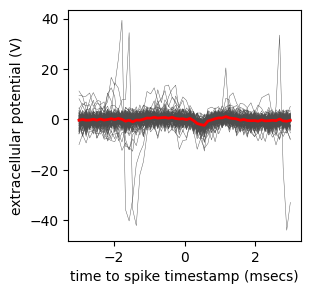

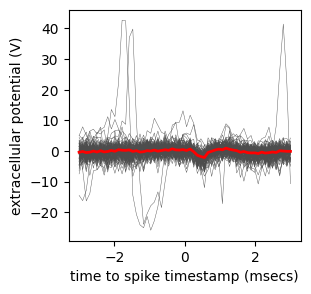

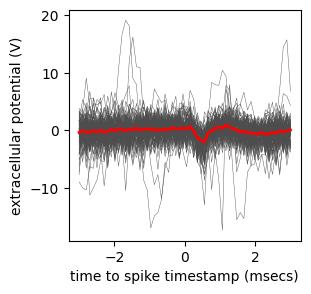

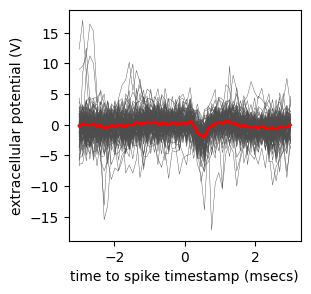

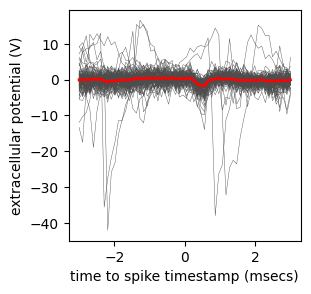

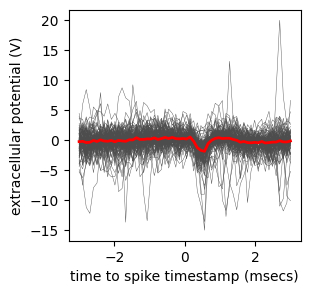

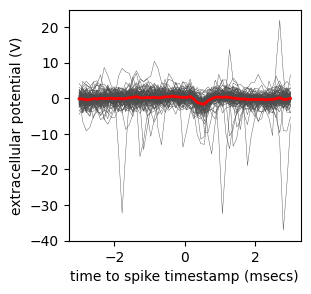

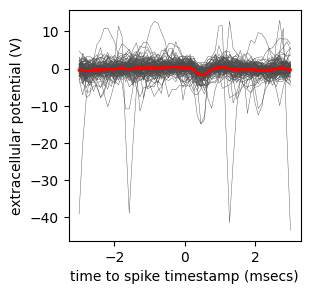

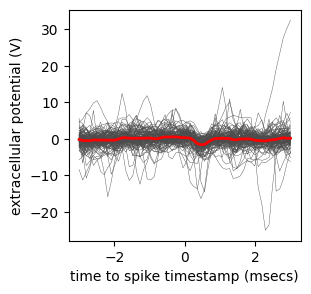

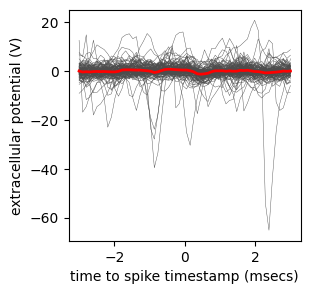

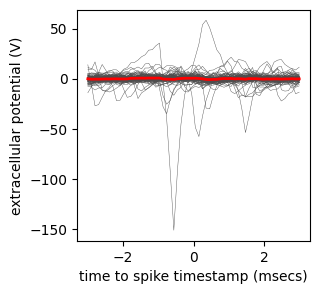

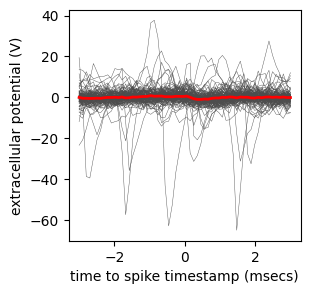

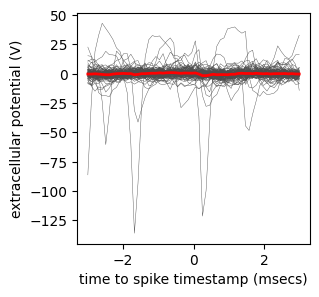

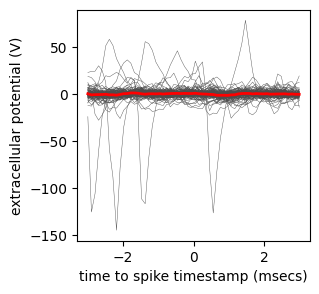

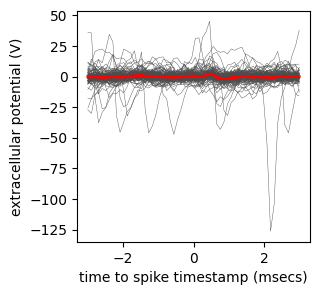

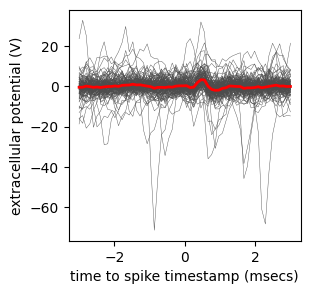

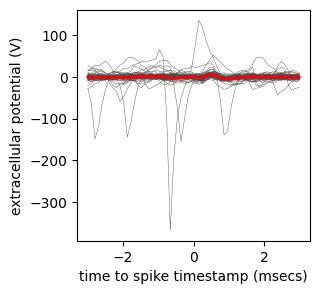

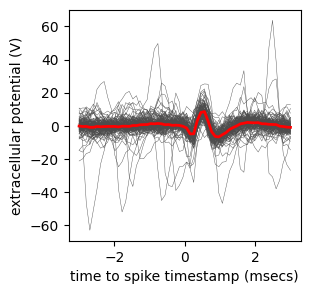

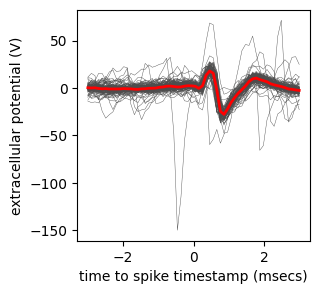

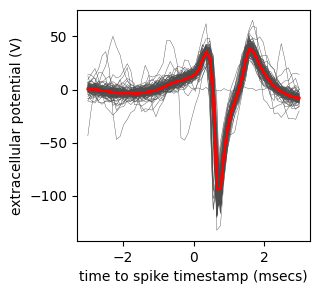

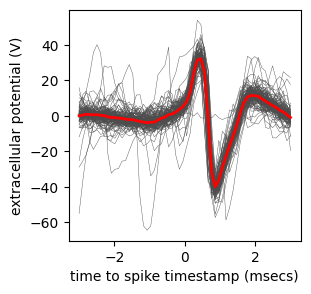

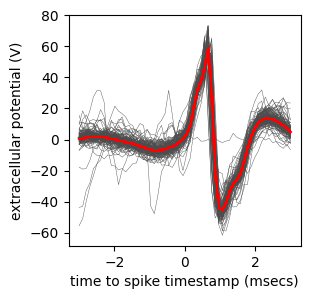

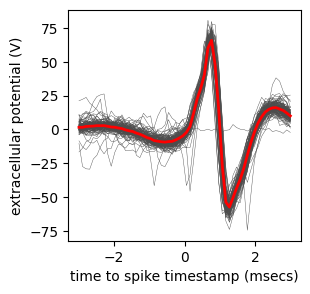

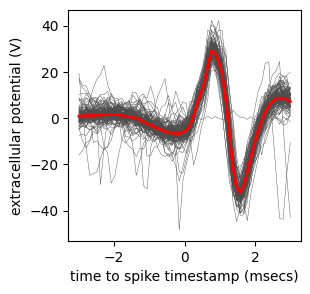

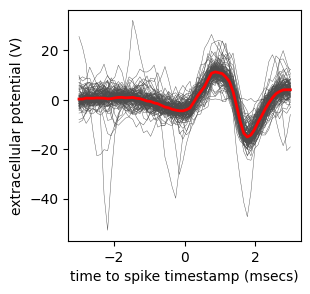

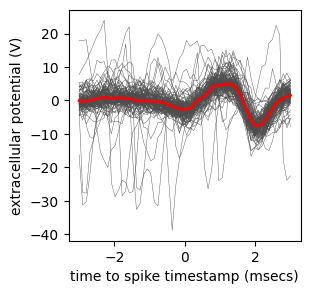

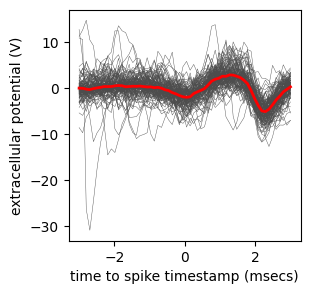

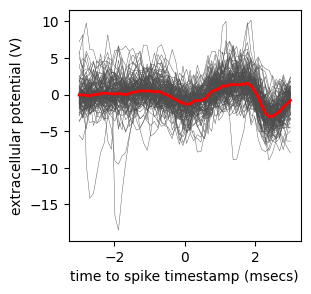

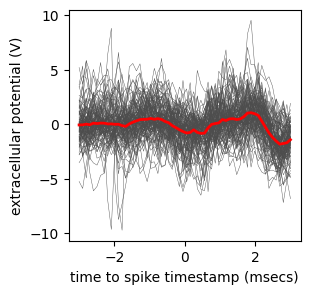

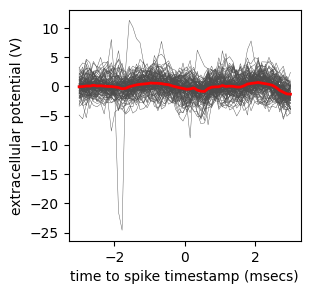

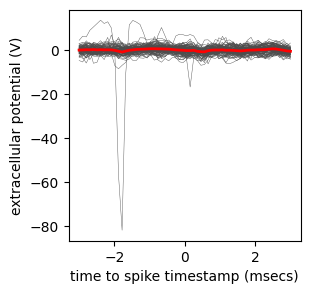

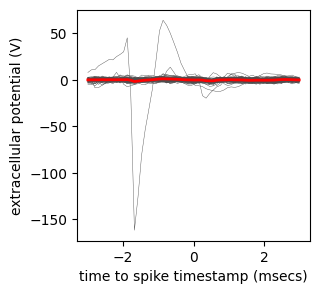

In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# load data
spike_instances = pd.read_pickle(INSTANCE_FILE_PATH)
spike_channel_ids = pd.read_pickle(CHANNEL_IDS_FILE_PATH)
spike_cell_labels = pd.read_pickle(CELL_LABELS_FILE_PATH)
# set cell and channel
# EXAMPLE_CELL_ID = 4209594
# EXAMPLE_CELL_ID = 4201515
# EXAMPLE_CELL_ID = 4199461
EXAMPLE_CELL_ID = 4190026
EXAMPLE_CHANNEL_IDs = np.arange(0,32,1)
for EXAMPLE_CHANNEL_ID in EXAMPLE_CHANNEL_IDs:
    # format as array
    cell_labels = np.array(spike_cell_labels)
    channel_ids = np.array(spike_channel_ids)
    instances = np.array(spike_instances)
    # locate instance idx for this cell and this channel
    instance_bool = np.logical_and(cell_labels==EXAMPLE_CELL_ID, channel_ids==EXAMPLE_CHANNEL_ID)
    instance_idx = np.where(instance_bool)[0]

    # plot
    figure, ax = plt.subplots(1,1, figsize=(3,3))

    ms_before=3
    ms_after =3

    time_axis = np.linspace(-ms_before, ms_after, num=60)

    ax.plot(time_axis, instances[instance_idx, :].T, color=[.3, .3, .3], linewidth=.3);
    ax.plot(time_axis, instances[instance_idx, :].T.mean(axis=1), linewidth=2, color="r");

    # setup legends
    ax.set_xlabel(
        "time to spike timestamp (msecs)",
        fontsize=10,
    )
    ax.set_ylabel("extracellular potential (V)", fontsize=10);

In [68]:
time_axis

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3.])